# Applying Gradient Descent to Boston Housing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
X = df[['LSTAT']].values
y = boston_data.target

In [33]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [34]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha *errors.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

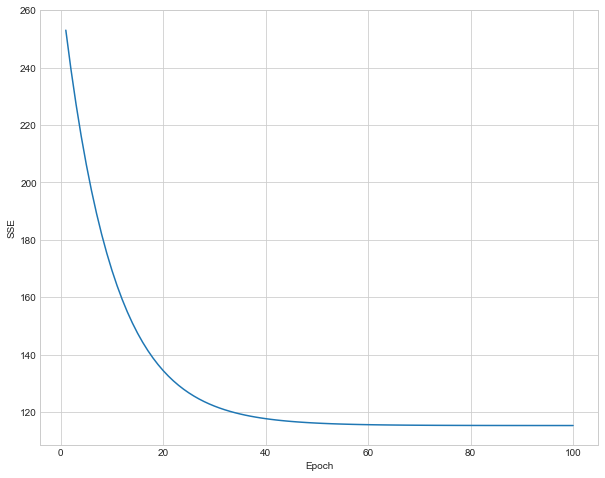

In [35]:
plt.figure(figsize=(10,8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel ('SSE');
plt.xlabel('Epoch');

In [21]:
w_

array([-7.57793828e-16, -7.33562757e-01])